##Machine Learning Assignment 1
Adam Elias<br>
CS430-ON<br>
Machine Learning in the Cloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430_MachineLearning/weather_2012.csv')

In [4]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [6]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
4391,7/1/2012 23:00,19.1,12.9,67,9,25.0,100.67,Mainly Clear
1376,2/27/2012 8:00,-9.8,-14.8,67,19,48.3,102.25,Cloudy
1327,2/25/2012 7:00,-1.4,-2.9,89,33,1.2,98.11,"Snow,Blowing Snow"
3733,6/4/2012 13:00,13.0,7.4,69,24,24.1,100.75,Rain
5933,9/4/2012 5:00,20.7,14.6,68,9,25.0,101.11,Mostly Cloudy


In [7]:
df.columns

Index(['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

In [8]:
df = df.rename(columns={'Date/Time': 'date_time', 'Temp (C)': 'temp_c', 'Dew Point Temp (C)': 'dew_point', 'Rel Hum (%)': 'relative_humidity', 'Wind Spd (km/h)': 'wind_speed', 'Visibility (km)': 'visibility', 'Stn Press (kPa)': 'pressure', 'Weather': 'weather'})

In [9]:
df.columns

Index(['date_time', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed',
       'visibility', 'pressure', 'weather'],
      dtype='object')

In [10]:
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [11]:
df['temp_f'] = (df['temp_c'] * 9/5) + 32

In [12]:
df['temp_f'].sample(10)

7302    57.20
3038    60.26
6795    52.34
2893    54.32
1879    49.82
3603    63.68
1834    36.68
1391    19.76
3525    61.88
4553    75.56
Name: temp_f, dtype: float64

In [13]:
column_to_move = df['temp_f']
df.drop(columns=['temp_f'], inplace=True)
df.insert(loc=1, column='temp_f', value=column_to_move)

In [14]:
df.sample(10)

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
3085,5/8/2012 13:00,52.70,11.5,9.6,88,17,6.4,100.35,"Rain,Fog"
1783,3/15/2012 7:00,31.10,-0.5,-1.9,90,13,16.1,102.40,Cloudy
96,1/5/2012 0:00,16.16,-8.8,-11.7,79,4,9.7,100.32,Snow
3276,5/16/2012 12:00,73.22,22.9,12.5,52,11,24.1,100.23,Mostly Cloudy
3134,5/10/2012 14:00,50.18,10.1,5.9,75,30,24.1,99.48,Cloudy
3455,5/23/2012 23:00,66.02,18.9,10.3,57,4,25.0,101.25,Clear
7455,11/6/2012 15:00,36.68,2.6,-7.7,47,15,48.3,101.87,Mostly Cloudy
1590,3/7/2012 6:00,24.26,-4.3,-10.3,63,15,24.1,101.98,Cloudy
3456,5/24/2012 0:00,61.52,16.4,10.4,68,0,25.0,101.28,Clear
4660,7/13/2012 4:00,69.44,20.8,14.6,68,13,24.1,101.49,Clear


In [15]:
df.dtypes

date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object

In [16]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [17]:
df.dtypes

date_time            datetime64[ns]
temp_f                      float64
temp_c                      float64
dew_point                   float64
relative_humidity             int64
wind_speed                    int64
visibility                  float64
pressure                    float64
weather                      object
dtype: object

In [28]:
df['month'] = df['date_time'].dt.month

monthly_avg = df.groupby('month')['temp_f'].mean()

print(monthly_avg)

month
1     18.731290
2     24.395000
3     37.618226
4     44.616750
5     61.227984
6     68.241250
7     73.022097
8     72.102742
9     61.672000
10    51.718952
11    33.676500
12    26.048629
Name: temp_f, dtype: float64


<Axes: xlabel='Temperature (F)', ylabel='Relative Humidity'>

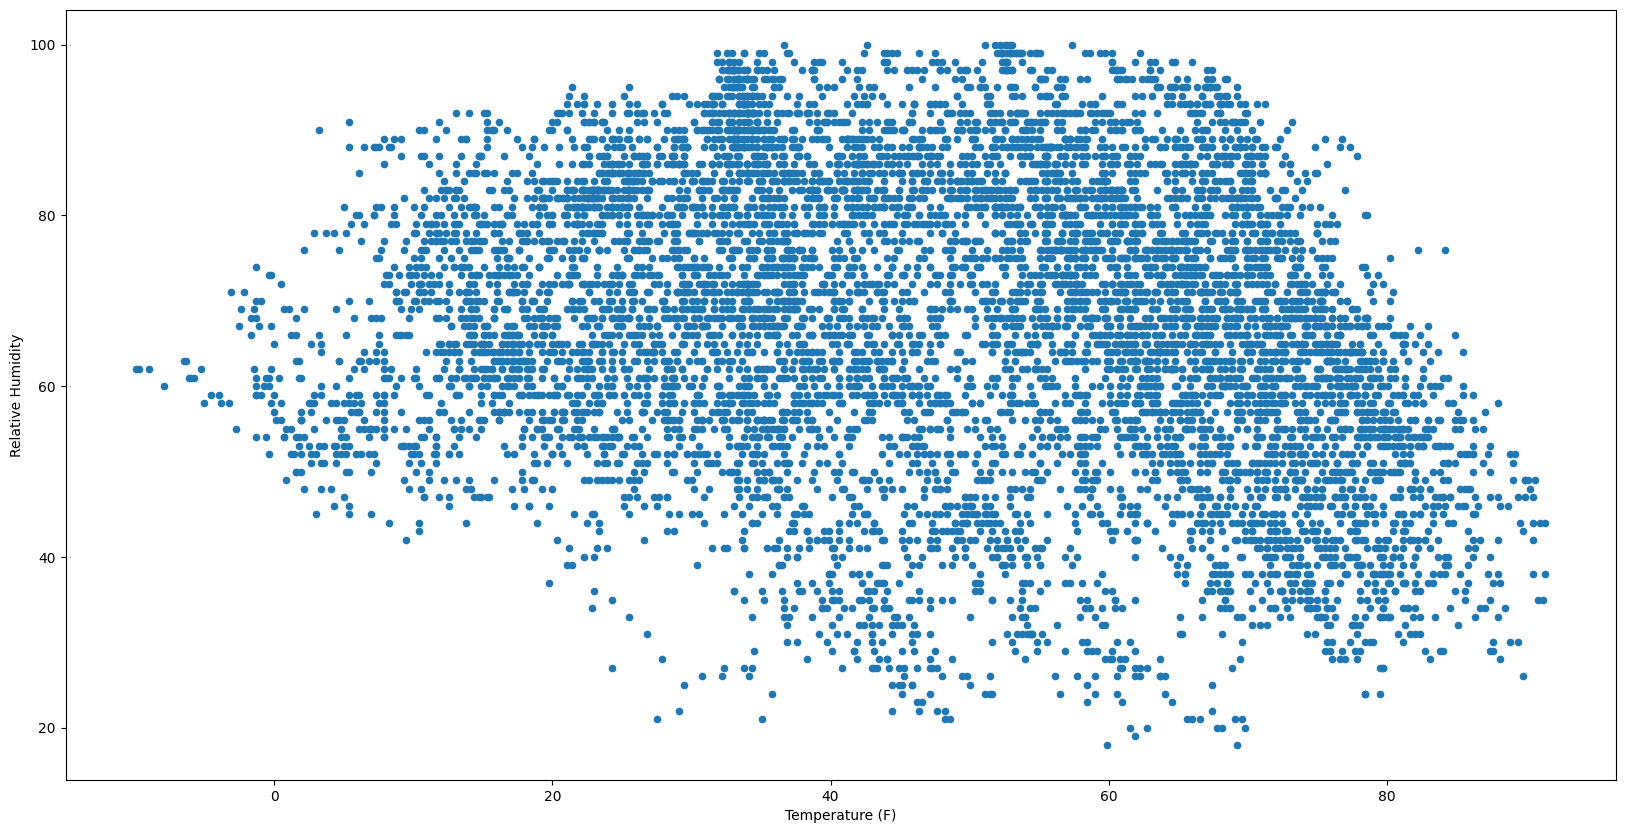

In [29]:
df.plot(kind='scatter', x='temp_f', y='relative_humidity', xlabel='Temperature (F)', ylabel='Relative Humidity', figsize=(20,10))

<Axes: xlabel='Month', ylabel='Temperature (F)'>

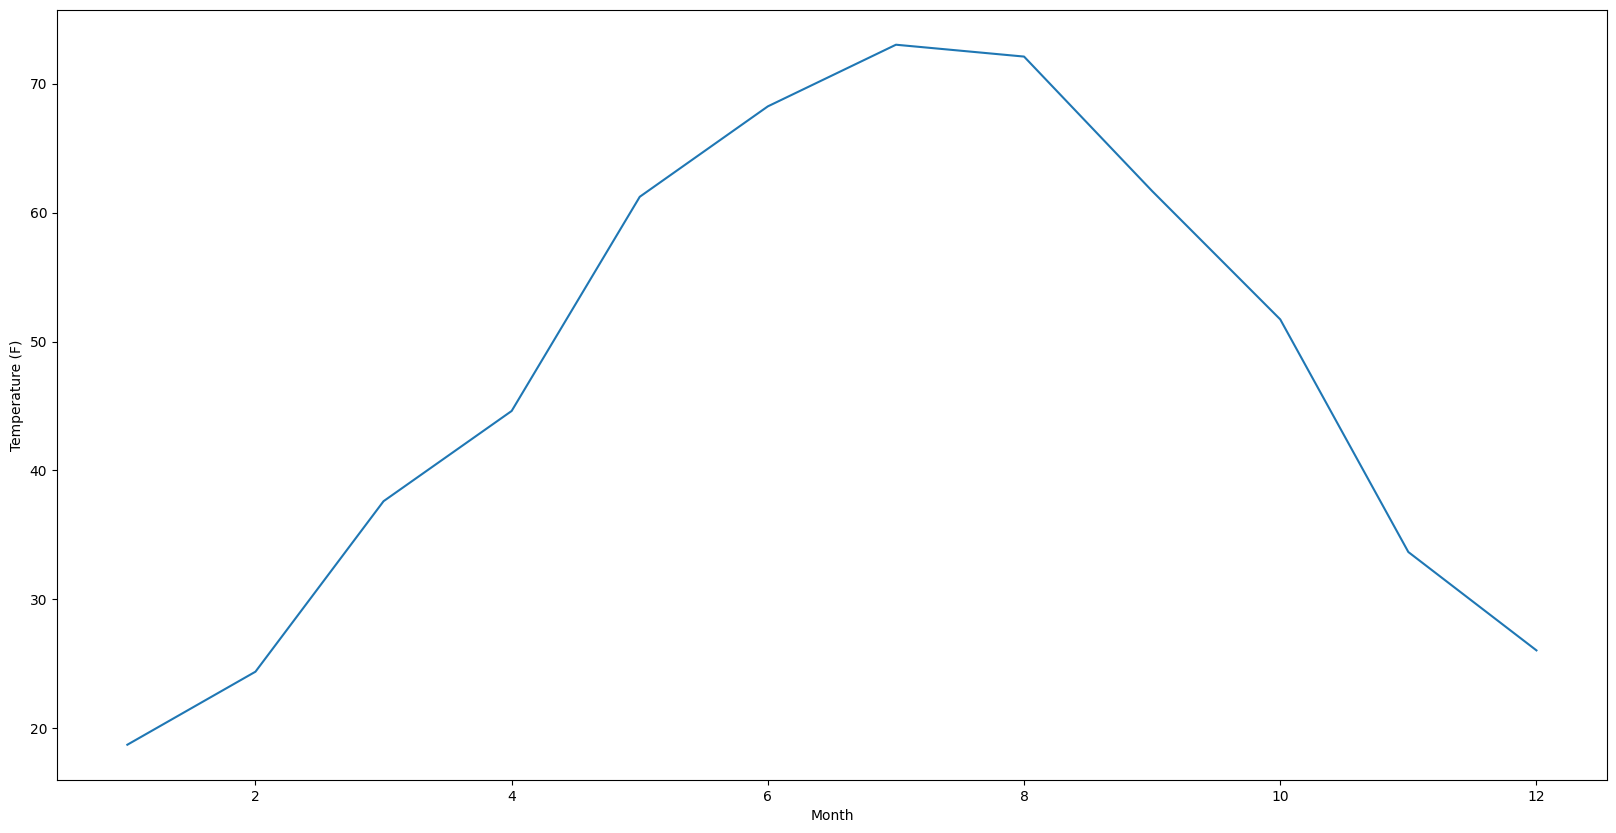

In [30]:
monthly_avg.plot(kind='line', x='month', y='temp_f', xlabel='Month', ylabel='Temperature (F)', figsize=(20,10))

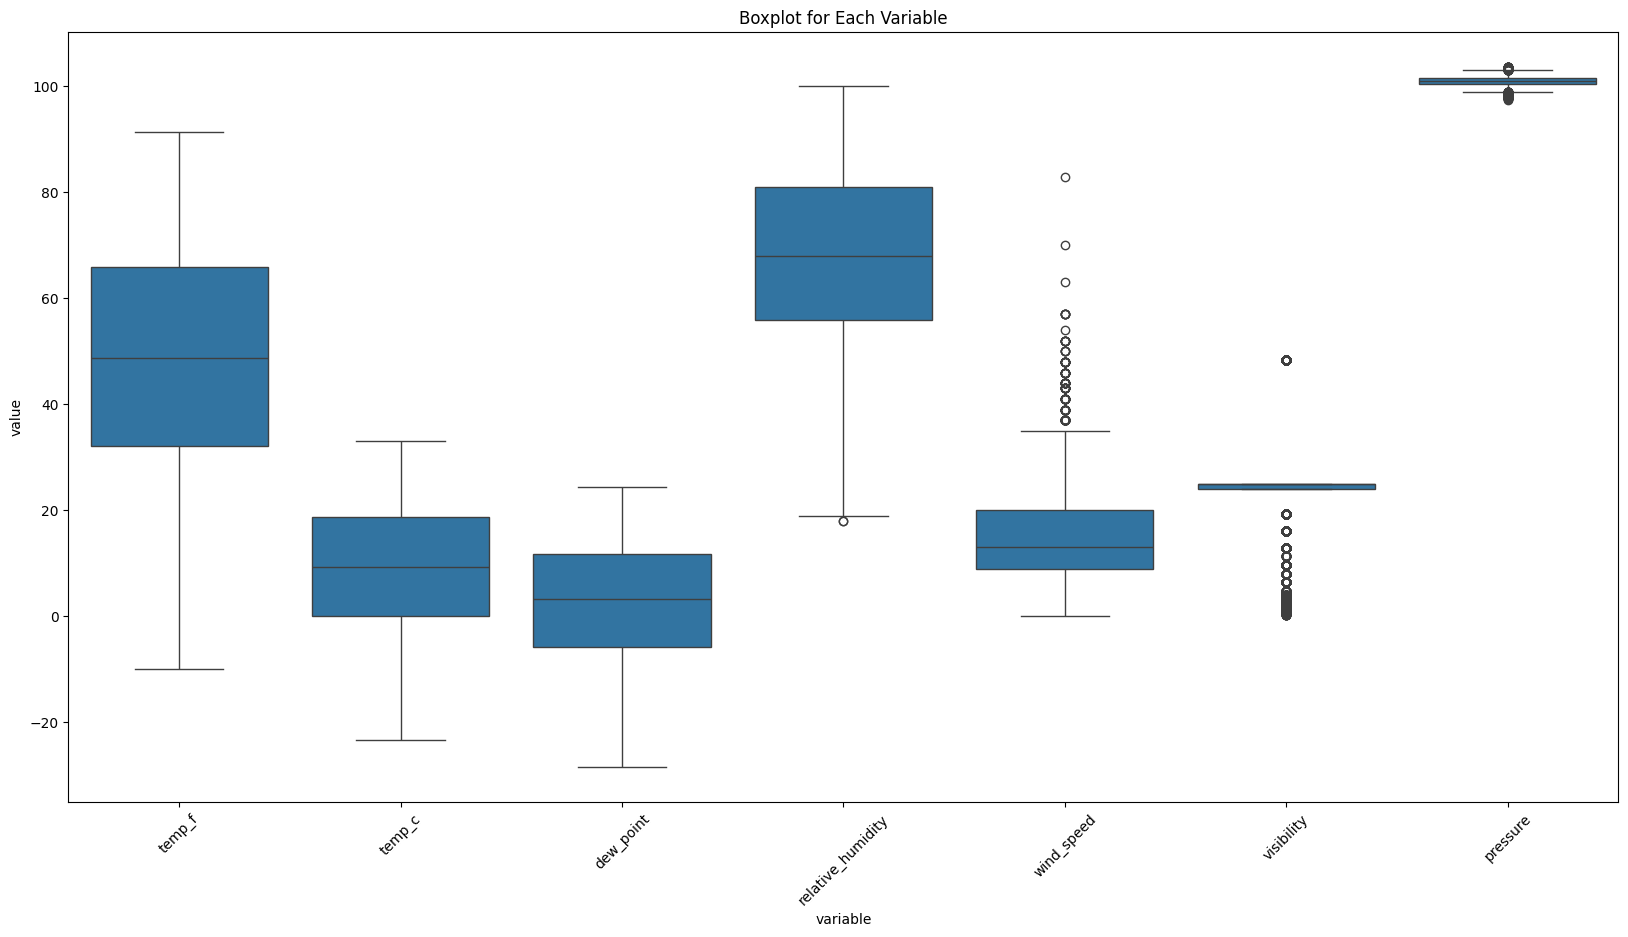

In [44]:
df_long = pd.melt(df, value_vars=['temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure'])
fig=plt.figure(figsize=(20,10))
sns.boxplot(x='variable', y='value', data=df_long)

plt.xticks(rotation=45)
plt.title('Boxplot for Each Variable')
plt.show()